# Custom SVR Tests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from svr import *

# First test: linear example
Generating data points from a linear objective function with gaussian noise

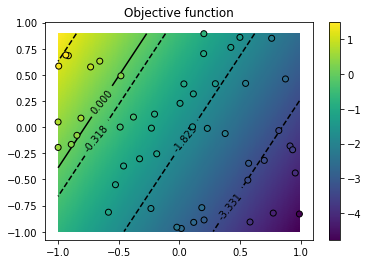

In [3]:
npoints = 50
noise = 0.1
w = np.random.randn(3)

X = np.random.rand(npoints, 2)*2 -1
y = np.matmul(X,w[:2])+w[2] + (np.random.randn(npoints)*noise)

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/4)

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')

plt.axis('tight')
x1_min, x1_max, x2_min, x2_max = X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()
    
X1, X2 = np.mgrid[x1_min:x1_max:200j, x1_min:x2_max:200j]
Y = np.matmul(np.c_[X1.ravel(), X2.ravel()],w[:2])+w[2]

#color plot the original function
Y = Y.reshape(X1.shape)
mesh = plt.pcolormesh(X1, X2, Y)
con = plt.contour(X1, X2, Y, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(con, inline=1, fontsize=10)
zeroc = plt.contour(X1, X2, Y, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zeroc, inline=1, fontsize=10)
plt.colorbar(mesh, extendfrac='auto')

plt.title("Objective function")
plt.show()

Linear SVR
Score: 0.965647


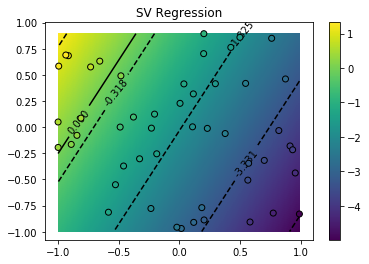

In [4]:
print("Linear SVR")
svr_lin = SVR(C=1.0, epsilon=0.1, kernel='linear')
svr_lin.fit(X_Train,y_Train)
print("Score: %f" % svr_lin.score(X_Test,y_Test))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ylsvr = svr_lin.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshlsvr = plt.pcolormesh(X1, X2, Ylsvr)
conlsvr = plt.contour(X1, X2, Ylsvr, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(conlsvr, inline=1, fontsize=10)
zeroclsvr = plt.contour(X1, X2, Ylsvr, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zeroclsvr, inline=1, fontsize=10)
plt.colorbar(meshlsvr, extendfrac='auto')

plt.title("SV Regression")
plt.show()

In [5]:
print(svr_lin.sv)
print(len(svr_lin.sv))

[array([ 0.58381977, -0.90736236]), array([0.50052274, 0.85834448]), array([-0.8429512, -0.0786581]), array([ 0.77504254, -0.82212475]), array([ 0.37890355, -0.06153767]), array([ 0.93484002, -0.21659487]), array([-0.18525599, -0.2553239 ]), array([-0.80988445,  0.0858069 ]), array([ 0.99080549, -0.83085189]), array([-0.52534721, -0.550902  ]), array([ 0.82114145, -0.0329555 ]), array([-0.9135165 ,  0.68316176]), array([-0.01936102, -0.95755279]), array([-0.20316052,  0.12422734])]
14


Comparison with Sklearn SVR

Linear SVR
Score: 0.991946


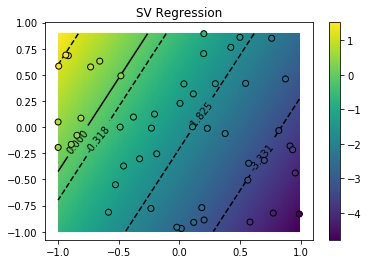

[[ 0.58381977 -0.90736236]
 [ 0.50052274  0.85834448]
 [-0.8429512  -0.0786581 ]
 [ 0.77504254 -0.82212475]
 [ 0.37890355 -0.06153767]
 [ 0.93484002 -0.21659487]
 [-0.18525599 -0.2553239 ]
 [-0.80988445  0.0858069 ]
 [ 0.99080549 -0.83085189]
 [-0.52534721 -0.550902  ]
 [ 0.82114145 -0.0329555 ]
 [-0.9135165   0.68316176]
 [-0.01936102 -0.95755279]
 [-0.20316052  0.12422734]]
14


In [6]:
print("Linear SVR")
svr_lin = svm.SVR(C=1.0, epsilon=0.1, kernel='linear')
svr_lin.fit(X_Train,y_Train)
print("Score: %f" % svr_lin.score(X_Test,y_Test))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ylsvr = svr_lin.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshlsvr = plt.pcolormesh(X1, X2, Ylsvr)
conlsvr = plt.contour(X1, X2, Ylsvr, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(conlsvr, inline=1, fontsize=10)
zeroclsvr = plt.contour(X1, X2, Ylsvr, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zeroclsvr, inline=1, fontsize=10)
plt.colorbar(meshlsvr, extendfrac='auto')

plt.title("SV Regression")
plt.show()

print(svr_lin.support_vectors_)
print(len(svr_lin.support_vectors_))

SVR with grid search model selection

Best parameters set found on development set:
{'C': 4, 'epsilon': 0.05, 'kernel': 'linear'}
Test score: 0.996081


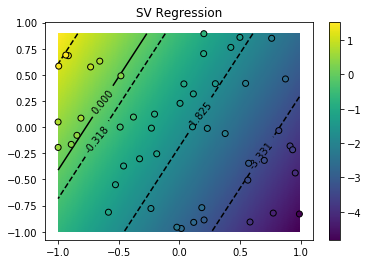

[[ 7.75042544e-01 -8.22124746e-01]
 [ 6.85201059e-03  2.27305730e-01]
 [ 9.90805488e-01 -8.30851888e-01]
 [ 2.03262164e-01  8.93424343e-01]
 [-2.03160522e-01  1.24227338e-01]
 [ 7.62121868e-01  8.49339595e-01]
 [-5.83275526e-01 -8.13932966e-01]
 [ 2.98128987e-01  4.15122854e-01]
 [ 5.47349817e-01  4.17998296e-01]
 [ 9.34840016e-01 -2.16594868e-01]
 [ 3.87492858e-02  4.13155101e-01]
 [ 4.25533216e-01  7.62345552e-01]
 [ 1.86405833e-01 -7.70126768e-01]
 [-4.86653349e-01  3.20337009e-04]
 [-5.25347205e-01 -5.50902001e-01]
 [-1.85255991e-01 -2.55323898e-01]
 [-3.26574660e-01 -3.03045566e-01]
 [-4.58570601e-01 -3.72019441e-01]
 [ 1.72548819e-02 -9.69390819e-01]
 [ 8.21141449e-01 -3.29555014e-02]
 [ 2.31943601e-01 -1.22699903e-02]]
21


In [7]:
print("SVR with grid search model selection\n")

X_TrainAndValidation, X_Test, y_TrainAndValidation, y_Test = train_test_split(X, y, test_size = 1/3)


param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'kernel': ['linear']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

svreg = GridSearchCV(svm.SVR(), param_grid, cv=2)
svreg.fit(X_TrainAndValidation, y_TrainAndValidation)

print("Best parameters set found on development set:")
print(svreg.best_params_)
print("Test score: %f" % svreg.score(X_Test,y_Test))

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolor='k')
plt.axis('tight')

Ysvreg = svreg.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
meshsvreg = plt.pcolormesh(X1, X2, Ysvreg)
consvreg = plt.contour(X1, X2, Ysvreg, colors=['k']*10, linestyles=['--']*10, levels=np.linspace(y.min(), y.max(), num=5))
plt.clabel(consvreg, inline=1, fontsize=10)
zerocsvreg = plt.contour(X1, X2, Ysvreg, colors=['k'], linestyles=['-'], levels=[0])
plt.clabel(zerocsvreg, inline=1, fontsize=10)
plt.colorbar(meshsvreg, extendfrac='auto')

plt.title("SV Regression")
plt.show()

print(svreg.best_estimator_.support_vectors_)
print(len(svreg.best_estimator_.support_vectors_))